<a href="https://colab.research.google.com/github/mounisha123-ram/Multiple-Disease-Prediction/blob/main/Project4_Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import pickle
from google.colab import files

In [ ]:
df=pd.read_csv('/content/kidney_disease - kidney_disease.csv')
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
# Assuming your dataframe is named df

df.rename(columns={
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red_Blood_Cells',
    'pc': 'Pus_Cell',
    'pcc': 'Pus_Cell_Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes_Mellitus',
    'cad': 'Coronary_Artery_Disease',
    'appet': 'Appetite',
    'pe': 'Pedal_Edema',
    'ane': 'Anemia',
    'classification': 'Status'
}, inplace=True)

In [ ]:
print(df['Status'].unique())
print(df['Status'].value_counts())

['ckd' 'notckd']
Status
ckd       250
notckd    150
Name: count, dtype: int64


In [ ]:
df.shape

(400, 26)

# **Column Name abbreviations **

Column Name	Likely Full Form / Meaning
id	Identifier for each record
age	Age of the patient
bp	Blood Pressure
sg	Specific Gravity (urine test)
al	Albumin (urine test)
su	Sugar (urine test)
rbc	Red Blood Cells (normal/abnormal)
pc	Pus Cells (normal/abnormal)
pcc	Pus Cell Clumps (present/not present)
ba	Bacteria (present/not present)
bgr	Blood Glucose Random
bu	Blood Urea
sc	Serum Creatinine
sod	Sodium level
pot	Potassium level
hemo	Hemoglobin
pcv	Packed Cell Volume
wc	White Blood Cell Count
rc	Red Blood Cell Count
htn	Hypertension (yes/no)
dm	Diabetes Mellitus (yes/no)
cad	Coronary Artery Disease (yes/no)
appet	Appetite (good/poor)
pe	Pedal Edema (yes/no)
ane	Anemia (yes/no)
classification	Target variable (e.g., disease presence)


Key points:
These columns mostly correspond to kidney-related tests and general health conditions.

For heart disease datasets, you often see columns like cholesterol, thal, cp (chest pain type), restecg (resting ECG results), etc., which are not present here.

However, the columns htn, dm, and cad are directly related to heart conditions (hypertension, diabetes, coronary artery disease).



In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood_Pressure           388 non-null    float64
 3   Specific_Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red_Blood_Cells          248 non-null    object 
 7   Pus_Cell                 335 non-null    object 
 8   Pus_Cell_Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood_Glucose_Random     356 non-null    float64
 11  Blood_Urea               381 non-null    float64
 12  Serum_Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium                3

,id,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#checking missing values
df.isnull().sum()

,0
id,0
Age,9
Blood_Pressure,12
Specific_Gravity,47
Albumin,46
Sugar,49
Red_Blood_Cells,152
Pus_Cell,65
Pus_Cell_Clumps,4
Bacteria,4


In [ ]:
#percentage of the missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

id                          0.00
Age                         2.25
Blood_Pressure              3.00
Specific_Gravity           11.75
Albumin                    11.50
Sugar                      12.25
Red_Blood_Cells            38.00
Pus_Cell                   16.25
Pus_Cell_Clumps             1.00
Bacteria                    1.00
Blood_Glucose_Random       11.00
Blood_Urea                  4.75
Serum_Creatinine            4.25
Sodium                     21.75
Potassium                  22.00
Hemoglobin                 13.00
Packed_Cell_Volume         17.50
White_Blood_Cell_Count     26.25
Red_Blood_Cell_Count       32.50
Hypertension                0.50
Diabetes_Mellitus           0.50
Coronary_Artery_Disease     0.50
Appetite                    0.25
Pedal_Edema                 0.25
Anemia                      0.25
Status                      0.00
dtype: float64


In [ ]:
#to see the negative values in Each Column
(df.select_dtypes(include='number') < 0).sum()

,0
id,0
Age,0
Blood_Pressure,0
Specific_Gravity,0
Albumin,0
Sugar,0
Blood_Glucose_Random,0
Blood_Urea,0
Serum_Creatinine,0
Sodium,0


In [ ]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
import pandas as pd

# Find all cells with special characters (non-alphanumeric, excluding space)
special_chars = df.applymap(lambda x: isinstance(x, str) and any(not c.isalnum() and not c.isspace() for c in x))

# Show rows and columns that contain special characters
df[special_chars.any(axis=1)]

,id,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Status
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.dtypes

,0
id,int64
Age,float64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Sugar,float64
Red_Blood_Cells,object
Pus_Cell,object
Pus_Cell_Clumps,object
Bacteria,object


# **Handling NUll Values**

In [ ]:
# Convert 'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count' to numeric (remove non-numeric characters)
for col in ['Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count']:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.dtypes #checking that have changed or not

,0
id,int64
Age,float64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Sugar,float64
Red_Blood_Cells,object
Pus_Cell,object
Pus_Cell_Clumps,object
Bacteria,object


In [ ]:
df.replace(['nan', 'NaN', 'NAN', 'Nan'], np.nan, inplace=True)
print(df.isnull().sum())

#explanation for code
#df['rbc'] = ['normal', 'nan', 'abnormal', 'NaN']
# df['rbc'] = ['normal', np.nan, 'abnormal', np.nan] itha tha pannum

id                           0
Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatinine            17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          71
White_Blood_Cell_Count     106
Red_Blood_Cell_Count       131
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Status                       0
dtype: int64


In [ ]:
#handle missing values
#Numeric columns: --> Use mean/median for filling.

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

#Categorical columns:
#Use mode (most common value)

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
id,0
Age,0
Blood_Pressure,0
Specific_Gravity,0
Albumin,0
Sugar,0
Red_Blood_Cells,0
Pus_Cell,0
Pus_Cell_Clumps,0
Bacteria,0


In [ ]:
#datatype age is in float changed to int
df['Age'] = df['Age'].astype(int)

#drop the unnecessary column id
df.drop('id', axis=1, inplace=True)

In [ ]:
df.shape

(400, 25)

In [ ]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Status'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Sugar,float64
Red_Blood_Cells,object
Pus_Cell,object
Pus_Cell_Clumps,object
Bacteria,object
Blood_Glucose_Random,float64


# **EDA**

In [ ]:
df.select_dtypes(include=['int64',"float64"])

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count
0,48,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [ ]:
df.select_dtypes(exclude=['int64',"float64"])

,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Status
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [ ]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Status'],
      dtype='object')

In [ ]:
# Checking the Outliers and Distributions using Plotly

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Box Plots (for Outlier Detection)
for col in numerical_cols:
    fig = px.box(df, y=col, title=f' Box Plot of {col}', points="all", template="plotly_white")
    fig.update_layout(yaxis_title=col, title_x=0.5)
    fig.show()

In [ ]:
# Histograms with Rug Plot (for Distribution)
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Histogram of {col}', marginal="rug", nbins=30, template="plotly_white")
    fig.update_layout(xaxis_title=col, title_x=0.5)
    fig.show()

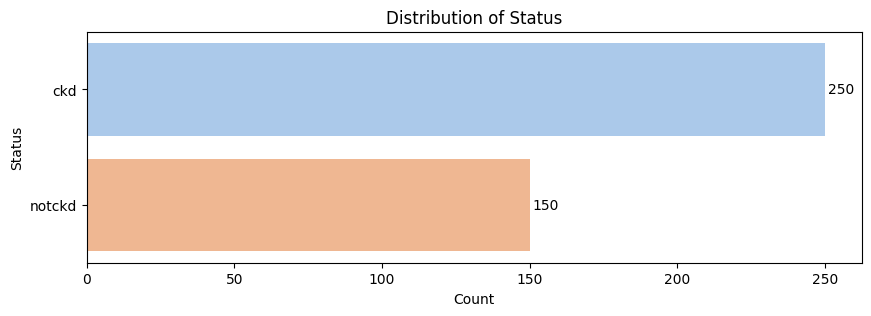

In [ ]:
# Countplot for status (target column)
plt.figure(figsize=(10, 3))
ax = sns.countplot(y='Status', data=df, palette='pastel')
plt.title("Distribution of Status")
plt.xlabel("Count")
plt.ylabel("Status")

# Add count labels on bars
for p in ax.patches:
    count = int(p.get_width())
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2, count, va='center')

plt.show()

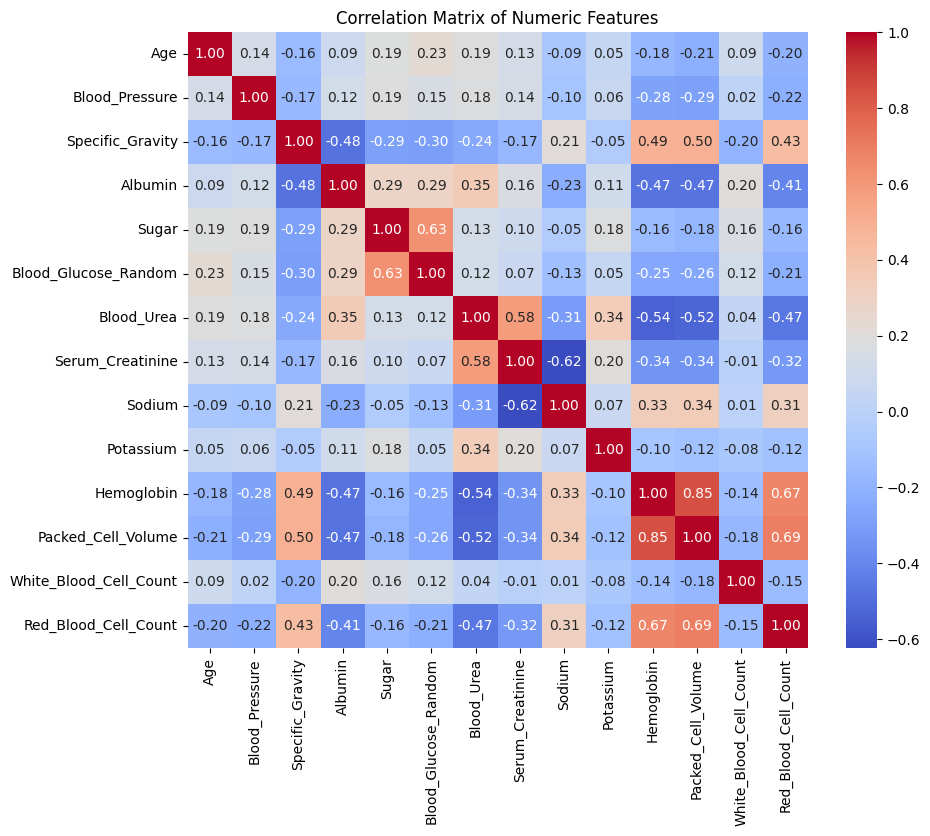

In [ ]:
# Calculate correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

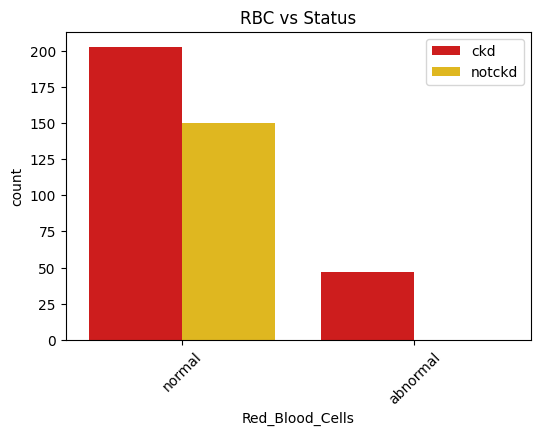

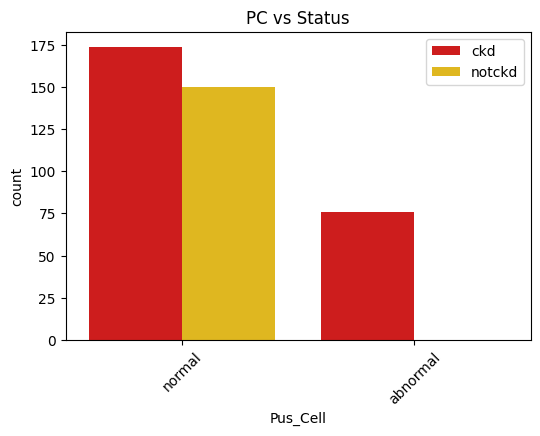

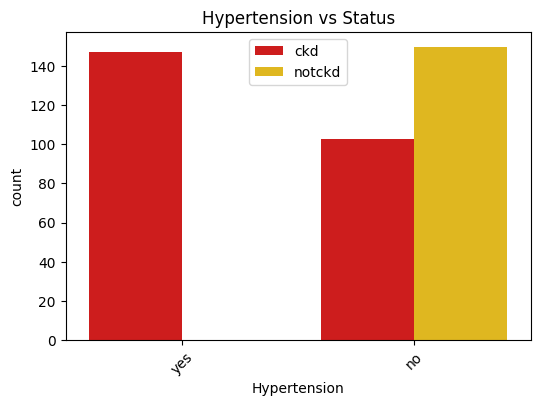

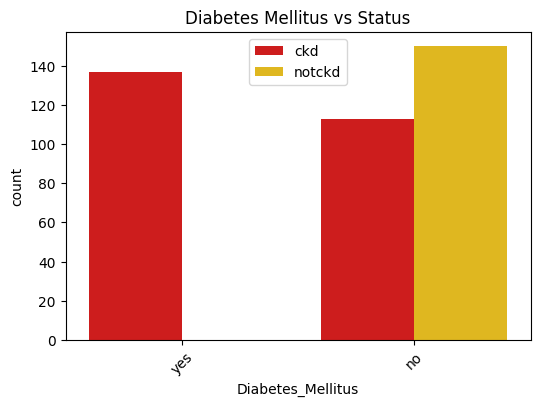

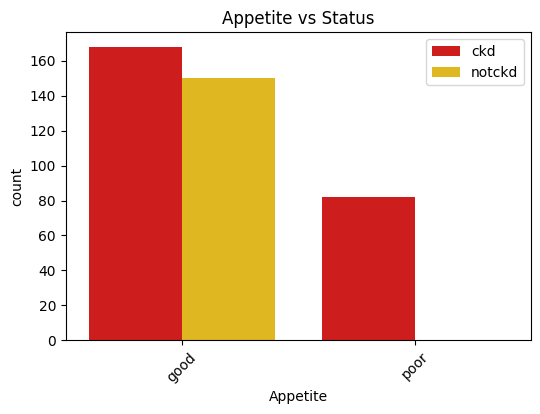

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# RBC vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Red_Blood_Cells', hue='Status', data=df, palette='hot')
plt.title("RBC vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# PC vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Pus_Cell', hue='Status', data=df, palette='hot')
plt.title("PC vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# HTN vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Hypertension', hue='Status', data=df, palette='hot')
plt.title("Hypertension vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# DM vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_Mellitus', hue='Status', data=df, palette='hot')
plt.title("Diabetes Mellitus vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

# Appet vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Appetite', hue='Status', data=df, palette='hot')
plt.title("Appetite vs Status")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#download cleaned csv file
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_kidney_data.csv', index=False)

# Download the file
#files.download('cleaned_kidney_data.csv')

In [ ]:
df.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'Status'],
      dtype='object')

# **Encoding**

In [ ]:
# List of your categorical columns
cat_columns = ['Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria', 'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia', 'Status']

# Loop to print unique values for each column
for col in cat_columns:
    print(f"Unique values in '{col}': {df[col].unique()}\n")

Unique values in 'Red_Blood_Cells': ['normal' 'abnormal']

Unique values in 'Pus_Cell': ['normal' 'abnormal']

Unique values in 'Pus_Cell_Clumps': ['notpresent' 'present']

Unique values in 'Bacteria': ['notpresent' 'present']

Unique values in 'Hypertension': ['yes' 'no']

Unique values in 'Diabetes_Mellitus': ['yes' 'no']

Unique values in 'Coronary_Artery_Disease': ['no' 'yes']

Unique values in 'Appetite': ['good' 'poor']

Unique values in 'Pedal_Edema': ['no' 'yes']

Unique values in 'Anemia': ['no' 'yes']

Unique values in 'Status': ['ckd' 'notckd']



In [ ]:
# List of categorical columns
cat_columns = [
    'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
    'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease',
    'Appetite', 'Pedal_Edema', 'Anemia', 'Status'
]

# Define label mapping dictionary
label_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'normal': 1, 'abnormal': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0
}

# Apply label encoding
for col in cat_columns:
    df[col] = df[col].map(label_map)

In [ ]:
df.dtypes

,0
Age,int64
Blood_Pressure,float64
Specific_Gravity,float64
Albumin,float64
Sugar,float64
Red_Blood_Cells,int64
Pus_Cell,int64
Pus_Cell_Clumps,int64
Bacteria,int64
Blood_Glucose_Random,float64


In [ ]:
df.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Status
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,7,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,1,0,0,1
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,0,0,1,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,1,0,0,1


In [ ]:
df['Status'].value_counts()

,count
Status,
1,250
0,150


# **Ml Model**

In [ ]:
# 1. Features and target
X = df.drop('Status', axis=1)
y = df['Status']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# 3. SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 5. Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# 6. Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 100.00%


In [ ]:
#Cross-validation
clf = RandomForestClassifier(random_state=42)

# 5-fold CV on the whole dataset (before train-test split & SMOTE)
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"📉 Standard Deviation: {cv_scores.std():.2f}")

Cross-validation accuracy scores: [0.9875 1.     0.9625 0.9875 1.    ]
Mean CV accuracy: 98.75%
📉 Standard Deviation: 0.01


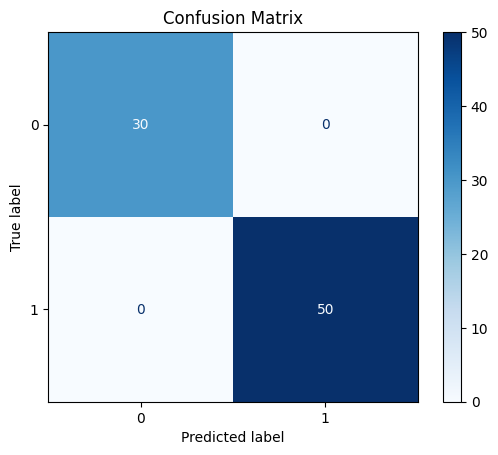

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Provide the actual class labels (0 and 1) to display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

AUC: 1.0000


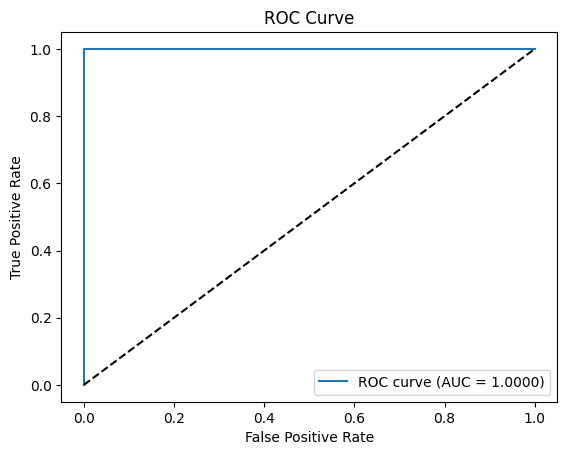

In [ ]:
# Get predicted probabilities for the positive class (class '1')
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.4f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# 7. Save model and scaler
with open("kidney_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("kidney_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
# Save scaled test data
pd.DataFrame(X_test_scaled).to_csv("X_test_kidney_scaled.csv", index=False)

# Save test labels
pd.DataFrame(y_test, columns=['Status']).to_csv("y_kidney_test.csv", index=False)